Exploratory Data Analysis (EDA) 
- is used to analyze the datasets using pandas, numpy, matplotlib, etc., and dealing with missing values. By doing EDA, we summarize their main importance.

Feature Engineering 
 - is the process of extracting features from raw data with some domain knowledge.

Feature Selection 
- is where we select those features from the dataframe that will give a high impact on the estimator.

Model creation 
 - in this, we create a machine learning model using suitable algorithms, e.g., regressor or classifier.

Deployment 
 - where we deploy our ML model on the web.

- https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

Accuracy
- (true positive + true negative) / total
- the number of accurate predicition over the total size

Precision 
- true positive / (true positive + false positive)
- over the total predicted positive 
- Precision is a good measure to determine, when the costs of False Positive is high
- higher better 

Recall 
- true positive / (true positive + false negative )
- over the total actual positive 
- Recall shall be the model metric we use to select our best model when there is a high cost associated with False Negative.

F1 score
- F1 which is a function of Precision and Recall
- to seek a balance between Precision and Recall.


In [52]:
import pandas as pd
import numpy as np
import pickle 

import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import re
import nltk
from nltk.util import pr
from nltk.corpus import stopwords
import string 

In [41]:
sb.set()
pd.set_option('display.max_colwidth', None)

In [42]:
#download stopwords
#nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english") #to reduce word to its stem > Lemmatization???
stopword = set(stopwords.words("english")) #to elimiate unimportand words, allowing applications to focus on the important word

## Handling imbalance dataset

- https://www.youtube.com/watch?v=JnlM4yLFNuo


# SE2019 dataset

In [198]:
df = pd.read_csv("Dataset/SE2019/cleaned_data1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   9000 non-null   object
 1   text    9000 non-null   object
 2   hate    9000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 211.1+ KB


In [45]:
df.groupby('class').describe()

text          
         count unique   
class                   
Hate      3783   3783  \
Non-Hate  5217   5217   

                                                                                                                                           
                                                                                                                                     top   
class                                                                                                                                      
Hate           Hurray, saving us $$$ in so many ways @potus @realDonaldTrump #LockThemUp #BuildTheWall #EndDACA #BoycottNFL #BoycottNike  \
Non-Hate  NY Times: 'Nearly All White' States Pose 'an Array of Problems' for Immigrants https://t.co/ACZKLhdMV9 https://t.co/CJAlSXCzR6   

               
         freq  
class          
Hate        1  
Non-Hate    1

In [46]:
df['class'].value_counts()

class
Non-Hate    5217
Hate        3783
Name: count, dtype: int64

# Text preprocessing

In [199]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text) #replace URL
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) #remove punctuation
    text = re.sub('\n', '', text) #remove line break
    text = re.sub('\w*\d\w*', '', text) #
    text = [word for word in text.split(' ') if word not in stopword]
    text = [stemmer.stem(word) for word in text]
    text = " ".join(text)
    return text

In [200]:
df['text'] = df['text'].apply(clean)
df.sample(5)

,class,text,hate
7686,Non-Hate,never proper taught put makeup look fanci whore daytim slut,0
1819,Non-Hate,media migrant journalist help fuel populist momentum,0
6032,Hate,crime bill lose licens rape sex clinton whore hous bribe moscow kickback wouldnt matter want trump,1
8562,Non-Hate,gelinzon sandwich maker sweep kitchen author enter today,0
169,Non-Hate,labor migrant transfer almost billion year ukrain,0


## Feature engineering

In [170]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [337]:
x = df["text"]
y = df["class"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state=42) #random state ensure same sample
print("Train Set :", x_train.shape, y_train.shape) 
print("Test Set  :", x_test.shape, y_test.shape) 


Train Set : (6300,) (6300,)
Test Set  : (2700,) (2700,)


7940

In [338]:
x_test.head()

7940                                         target movi section guy educ girlfriend star war facial express hyster
1162                                        itali allow two migrant rescu ship dock european countri offer take â… 
582     foxnew foxandfriend restoreusnowjust imagin sizeof red wave god bless trumpbuild wallbuildthatwal plz share
4081                                                           cyprus plight refuge live british base remain limbo 
8412                                                                             you'r bitch ass cunt hunterrowland
Name: text, dtype: object

In [252]:
# save model
def save_model(model, model_name):
    filename = f"models/{model_name}.pickle"
    pickle.dump(model, open(filename,"wb"))

https://towardsdatascience.com/multi-class-text-classification-model-comparison-and-selection-5eb066197568

# DecisionTreeClassifier

In [165]:
#convert given text to a vector base
from sklearn.tree import DecisionTreeClassifier

In [339]:
model = Pipeline([('vect', CountVectorizer()),
               ('clf', DecisionTreeClassifier()),
              ])
model_name = "dtc"
model.fit(x_train, y_train)
save_model(model, model_name)

In [340]:
save_model(model, model_name)

# SVM

- supervisied learning algorithm
- Unlike neural networks, SVMs can work with very small datasets and are not prone to overfitting.

In [341]:
from sklearn.linear_model import SGDClassifier

In [342]:
model = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
model_name = "svm"
model.fit(x_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [343]:
save_model(model, model_name)

# Logistic Regression

In [172]:
from sklearn.linear_model import LogisticRegression

In [344]:
model = Pipeline([('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', LogisticRegression(n_jobs=1, C=1e5,max_iter=6300)),
        ])
model_name = "lr"
model.fit(x_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 LogisticRegression(C=100000.0, max_iter=6300, n_jobs=1))])

In [345]:
save_model(model, model_name)

# Doc2Vec

# Results

In [351]:
# Predict data
print("Test Data Accuracy  :\t", model.score(x_test, y_test))
y_test_pred = model.predict(x_test)

Test Data Accuracy  :	 0.9996296296296296


In [327]:
# Classification report
print(classification_report(y_test, y_test_pred, labels=["Hate","Non-Hate"]))

              precision    recall  f1-score   support

        Hate       0.63      0.67      0.65      1106
    Non-Hate       0.76      0.73      0.75      1594

    accuracy                           0.70      2700
   macro avg       0.70      0.70      0.70      2700
weighted avg       0.71      0.70      0.71      2700



Count: Actual
Non-Hate    1534
Hate        1166
Name: count, dtype: int64

Count: Predict
Non-Hate    1518
Hate        1182
Name: count, dtype: int64



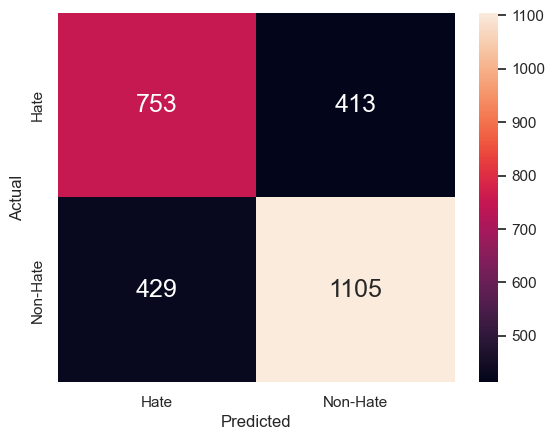

In [183]:
# Heatmap
ax = plt.subplot()

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred, labels=["Hate","Non-Hate"]), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax=ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.xaxis.set_ticklabels(["Hate","Non-Hate"])
ax.yaxis.set_ticklabels(["Hate","Non-Hate"])

# Count
df1 = pd.DataFrame({'Actual':y_test, 'Predict':y_test_pred})
# print(df1.describe())
print(f"Count: {df1['Actual'].value_counts()}")
print()
print(f"Count: {df1['Predict'].value_counts()}")
print()

# Model Compare

In [335]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

def print_score(y_test, y_test_pred):
    print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.2f}")
    score = precision_recall_fscore_support(y_test, y_test_pred, average="weighted")
    print(f"Precision: {score[0]:.2f}")
    print(f"Recall: {score[1]:.2f}")
    print(f"F1-score: {score[2]:.2f}")
    print()
    # print(precision_recall_fscore_support(y_test, y_test_pred, average="micro"))

In [347]:
# load model
model_to_load = ["dtc", "svm", "lr"]

for i in model_to_load:
    print(i)
    filename = f"models/{i}.pickle"
    old_model = pickle.load(open(filename,"rb"))
    y_test_pred = old_model.predict(x_test)
    print_score(y_test, y_test_pred)


dtc
Accuracy: 0.75
Precision: 0.75
Recall: 0.75
F1-score: 0.75

svm
Accuracy: 0.76
Precision: 0.77
Recall: 0.76
F1-score: 0.74

lr
Accuracy: 0.70
Precision: 0.71
Recall: 0.70
F1-score: 0.71



- dtc: 0.7518518518518519
- svm: 0.7574074074074074
- lr: 0.7044444444444444

## BERT

- https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270
- https://www.youtube.com/watch?v=hOCDJyZ6quA
- tensorflow hub bert https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4

- bert will convert sentence into embeding vector which will feed to neural network for training 
- consist of preprocess and embeding 

In [ ]:
encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"
preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"

## GPT

## WORD2VEC
- https://www.youtube.com/watch?v=hQwFeIupNP0